In [241]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

In [242]:
# Load dataset 

data = pd.read_csv(r"C:\Users\Administrator\Desktop\Datasets\udemy_courses.csv")
data.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid


In [3]:
# Drop url
data.drop('url', axis=1, inplace=True)

In [5]:
data.columns

Index(['course_id', 'course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'rating', 'content_duration',
       'published_timestamp', 'subject', 'Date', 'Free/Paid'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   int64  
 1   course_title         3676 non-null   object 
 2   price                3676 non-null   int64  
 3   num_subscribers      3676 non-null   int64  
 4   num_reviews          3676 non-null   int64  
 5   num_lectures         3676 non-null   int64  
 6   level                3676 non-null   object 
 7   rating               3676 non-null   float64
 8   content_duration     3676 non-null   float64
 9   published_timestamp  3676 non-null   object 
 10  subject              3676 non-null   object 
 11  Date                 3676 non-null   object 
 12  Free/Paid            3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


In [7]:
data.isnull().sum()

course_id              0
course_title           0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
rating                 0
content_duration       0
published_timestamp    0
subject                0
Date                   0
Free/Paid              0
dtype: int64

#### Problem Statement

Use the given dataset to answer the following questions and also building a machine learning model to predict whether a course is free or paid.

1. Which course has the highest number of subscribers?
2. For free and paid courses, which one has the highest number of subscriber?
3. Top 3 subject with more subscribers
4. In which month or year did a lot of people subscribe to a particular course?
5. What account for the increase in number of subscribers for the course with more subscribers?
6. Which course has the highest rating?
7. Number of paid and free courses?
8. Which subject generate more income in terms of price of course?
9. what is the highest paid course?
10. Build a machine learning model to predict whether a particular course is free or paid?

### 1. Course with the highest number of subscriber

In [13]:
num_subs=data[['course_title','num_subscribers']].sort_values(by='num_subscribers',ascending=False)[:10]
num_subs

,course_title,num_subscribers
0,Learn HTML5 Programming From Scratch,268923
1,Coding for Entrepreneurs Basic,161029
2,The Web Developer Bootcamp,121584
3,Build Your First Website in 1 Week with HTML5 ...,120291
4,The Complete Web Developer Course 2.0,114512
5,Free Beginner Electric Guitar Lessons,101154
6,Web Design for Web Developers: Build Beautiful...,98867
7,Learn Javascript & JQuery From Scratch,84897
8,Practical PHP: Master the Basics and Code Dyna...,83737
9,JavaScript: Understanding the Weird Parts,79612


In [56]:
fig = px.bar(num_subs, x='course_title',y='num_subscribers',
             title='<b>Courses with high number of Subscribers</b>', color='num_subscribers',template='plotly_white')

fig.show()

### 2.  Total number of subscribers for free and paid courses


In [32]:
free_paid = data[['Free/Paid','num_subscribers']]
free_paid_num_subs=free_paid.groupby('Free/Paid').sum()
free_paid_num_subs

,num_subscribers
Free/Paid,
Free,3586551
Paid,8173932


In [38]:
fig = px.pie(free_paid_num_subs, values='num_subscribers', names= free_paid_num_subs.index,
             title='<b>Percentage of Free and Paid Subscribers</b>',hole=0.6)
fig.show()

### 3. Top Subjects with higher number of subscribers

In [44]:
subjects_subs = data[['subject', 'num_subscribers']]
all_subjects = subjects_subs.groupby('subject').sum()

In [59]:
fig = px.bar(all_subjects, x=all_subjects.index, y='num_subscribers',color ='num_subscribers',
             title='<b>Subjects with higher number of Subscribers</b>',template='plotly_white')
fig.show()

### The month or year in which number of subscribers for a particular course increase

In [73]:
date_subs = data[['Date','course_title','num_subscribers']]
#.sort_values(by='num_subscribers',ascending=False)


In [98]:
fig = px.histogram(date_subs, x='Date',y='num_subscribers',template='plotly_white')
fig.show()

### 6. High rating  course

In [111]:
high_rating = data[['course_title','rating','num_subscribers','Free/Paid']].sort_values(by='rating',ascending=False)
high_rating[:10]

,course_title,rating,num_subscribers,Free/Paid
1746,Forex Trading: Your Complete Guide to Get Star...,1.0,1026,Paid
1818,#5 Piano Hand Coordination: Piano Runs in 2 Be...,1.0,940,Paid
1184,JQuery DOM and Ajax Concept Explained for Begi...,1.0,1812,Paid
2801,Learn 3 - All Time A R Rahman Hits on Carnatic...,1.0,98,Paid
2603,How to Build WordPress Themes: A Web Designer'...,1.0,183,Paid
2620,Django by Example,1.0,170,Paid
266,The Complete PHP Bootcamp Course With Video Sh...,1.0,9831,Paid
2649,Learn How To Play 25 Classic Hip Hop Songs,1.0,153,Paid
3490,Aprende a tocar el clarinete.,1.0,4,Paid
2033,Building a ASP.NET MVC 5 Membership Website,1.0,654,Paid


In [115]:
high_rating.sort_values(by='num_subscribers', ascending=False)[:10]

,course_title,rating,num_subscribers,Free/Paid
0,Learn HTML5 Programming From Scratch,0.82,268923,Free
1,Coding for Entrepreneurs Basic,0.69,161029,Free
2,The Web Developer Bootcamp,0.89,121584,Paid
3,Build Your First Website in 1 Week with HTML5 ...,0.78,120291,Free
4,The Complete Web Developer Course 2.0,0.55,114512,Paid
5,Free Beginner Electric Guitar Lessons,0.88,101154,Free
6,Web Design for Web Developers: Build Beautiful...,0.82,98867,Free
7,Learn Javascript & JQuery From Scratch,0.79,84897,Paid
8,Practical PHP: Master the Basics and Code Dyna...,0.85,83737,Free
9,JavaScript: Understanding the Weird Parts,0.69,79612,Paid


### 7. Total number of free and paid courses

In [119]:
num_FP = data.groupby(by='Free/Paid').course_title.count()
num_FP

Free/Paid
Free     311
Paid    3365
Name: course_title, dtype: int64

In [123]:
fig = px.pie(num_FP, values=num_FP.values,names=num_FP.index,hole=0.6)
fig.show()

### 8. Subject that generate more income

In [126]:
sub_income = data.groupby(by='subject').price.sum()
sub_income

subject
Business Finance       81815
Graphic Design         34850
Musical Instruments    33700
Web Development        92675
Name: price, dtype: int64

In [134]:
fig = px.bar(sub_income, template='plotly_white', color= sub_income.values)
fig.show()

### 9. Highest paid course

In [138]:
data[['course_title','price']].sort_values(by='price',ascending=False)[:10]

,course_title,price
2822,Learning Path: React: Make Stunning React Webs...,200
1592,Mastering Futures Options for Beginners - Your...,200
1599,Invest Like a Pro!,200
1616,Make Tech circles in Adobe Photoshop and Illus...,200
1632,Parse Server: From Front End to Full Stack,200
1637,Trading Robot Forex Programs in Your Sleep in ...,200
377,Get Started With Penny Stocks -Step by Step Gu...,200
375,Quicklessons Piano Course - Learn to Play Pian...,200
3527,会声会影深度教学,200
1644,Complete Guide to Front-End Web Development an...,200


## Prepare the dataset for machine learning
### using Decision Tree

In [139]:
data.head()

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid
0,41295,Learn HTML5 Programming From Scratch,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free
1,59014,Coding for Entrepreneurs Basic,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free
2,625204,The Web Developer Bootcamp,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid
3,173548,Build Your First Website in 1 Week with HTML5 ...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free
4,764164,The Complete Web Developer Course 2.0,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid


In [140]:
# Drop published_timestamp
data.drop('published_timestamp',axis=1, inplace=True)

In [143]:
#drop course_id
data.drop('course_id', axis=1, inplace=True)

In [144]:
data.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,subject,Date,Free/Paid
0,Learn HTML5 Programming From Scratch,0,268923,8629,45,Beginner Level,0.82,10.5,Web Development,2013-02-14,Free
1,Coding for Entrepreneurs Basic,0,161029,279,27,Expert Level,0.69,3.5,Web Development,2013-06-09,Free
2,The Web Developer Bootcamp,200,121584,27445,342,Beginner Level,0.89,43.0,Web Development,2015-11-02,Paid
3,Build Your First Website in 1 Week with HTML5 ...,0,120291,5924,30,All Levels,0.78,3.0,Web Development,2014-04-08,Free
4,The Complete Web Developer Course 2.0,200,114512,22412,304,Beginner Level,0.55,30.5,Web Development,2016-03-08,Paid


In [146]:
# convert the categorical data into numerical
data['course_code'] =data['course_title'].astype("category").cat.codes 


In [147]:
data['level_code'] = data["level"].astype("category").cat.codes
data['subject_code'] = data["subject"].astype("category").cat.codes

In [156]:
data['F_P_code']= data["Free/Paid"].astype("category").cat.codes

In [157]:
data.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,subject,Date,Free/Paid,course_code,level_code,subject_code,F_P_code
0,Learn HTML5 Programming From Scratch,0,268923,8629,45,Beginner Level,0.82,10.5,Web Development,2013-02-14,Free,2108,1,3,0
1,Coding for Entrepreneurs Basic,0,161029,279,27,Expert Level,0.69,3.5,Web Development,2013-06-09,Free,755,2,3,0
2,The Web Developer Bootcamp,200,121584,27445,342,Beginner Level,0.89,43.0,Web Development,2015-11-02,Paid,3296,1,3,1
3,Build Your First Website in 1 Week with HTML5 ...,0,120291,5924,30,All Levels,0.78,3.0,Web Development,2014-04-08,Free,590,0,3,0
4,The Complete Web Developer Course 2.0,200,114512,22412,304,Beginner Level,0.55,30.5,Web Development,2016-03-08,Paid,3227,1,3,1


In [158]:
## Lets check correlation between variables
data_corr = data.corr()

<AxesSubplot:>

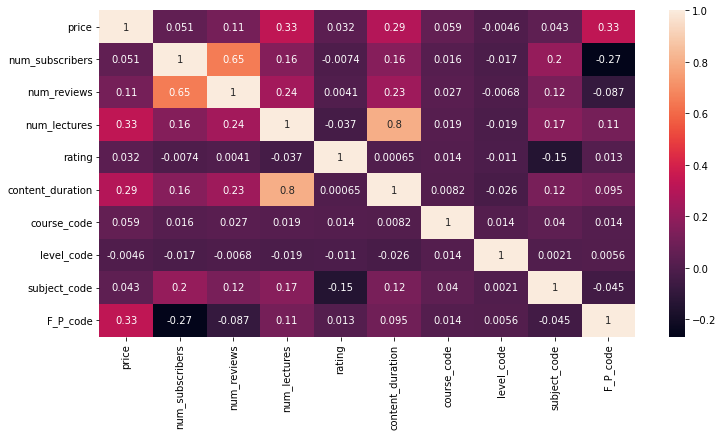

In [159]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data_corr, annot=True)

### Import Machine Learning libraries

In [160]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [162]:
# set the dataset into Feature and Target sets
x= data[['price','num_subscribers','num_reviews','num_lectures','rating','content_duration','course_code','level_code','subject_code']]
y = data[['Free/Paid']]

In [165]:
print(x.shape)
print(y.shape)

(3676, 9)
(3676, 1)


In [166]:
# Sp;it X and Y into train and test sets
x_train, x_test, y_train,y_test= train_test_split(x, y, test_size= 0.25, random_state =100)

print(x_train.shape)
print(y_train.shape)

(2757, 9)
(2757, 1)


In [167]:
print(x_test.shape)
print(y_test.shape)

(919, 9)
(919, 1)


In [168]:
# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf = 5, random_state=100)

In [169]:
# Train the model
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [172]:
# Predict the target y
y_pred = clf_entropy.predict(x_test)

### Check accuracy of model

In [174]:
from sklearn.metrics import accuracy_score

In [176]:
score = accuracy_score(y_test,y_pred)
score*100

100.0

## Accuracy of the model is 100%

In [189]:
y_test[:10]

,Free/Paid
2730,Paid
385,Paid
1238,Paid
1470,Paid
799,Paid
2620,Paid
2144,Paid
3420,Paid
3334,Paid
2708,Paid


In [180]:
y_pred[:10]

array(['Paid', 'Paid', 'Paid', 'Paid', 'Paid', 'Paid', 'Paid', 'Paid',
       'Paid', 'Paid'], dtype=object)

In [188]:
pd.crosstab(y_pred, y_test)

col_0,"(F, r, e, e, /, P, a, i, d)"
row_0,
Free,84
Paid,835


In [248]:
import re
def clean_title(title):
    return re.sub("[^a-zA-Z0-9]","", title)

In [249]:
data["clean_title"] = data["course_title"].apply(clean_title)

In [250]:
data.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,Date,Free/Paid,clean_title
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,2013-02-14,Free,LearnHTML5ProgrammingFromScratch
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,2013-06-09,Free,CodingforEntrepreneursBasic
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,2015-11-02,Paid,TheWebDeveloperBootcamp
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,2014-04-08,Free,BuildYourFirstWebsitein1WeekwithHTML5andCSS3
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,2016-03-08,Paid,TheCompleteWebDeveloperCourse20


## Building Search Engine

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf = vectorizer.fit_transform(data["course_title"])

In [244]:
from sklearn.metrics.pairwise import cosine_similarity


In [251]:
#search function
def search(title):
    title= clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = data.iloc[indices][::-1]
    return results

In [252]:
import ipywidgets as widgets
from IPython.display import display

course_input = widgets.Text(
    value="Learn HTML",
    description = "Course Title:",
    disabled = False
)

course_list = widgets.Output()

def on_type(val):
    with course_list:
        course_list.clear_output()
        title = val["new"]
        if len(title)>5:
            display(search(title))
        
course_input.observe(on_type, names='value')

display(course_input, course_list)

Text(value='Learn HTML', description='Course Title:')

Output()